In [1]:
import geopandas as gpd
import pandas as pd
import fiona
import geojsonio as gjsio
import os

Use read_file function to read shapefile for GPS points/trajectory

In [2]:
# Script for countig the number of GPS points in a given GPS trajectory
route = "C:/University Grade4/4G06/gert_compiled_v4.3/map-matching_shared_v4.3/data/gps_trajectory/14640_20070403_17_colocated.shp"
traj_data = gpd.read_file(route)
gpsPoints = traj_data.shape[0]
print("The number of GPS points: %s" % str(gpsPoints))

The number of GPS points: 121


In [3]:
traj_data.head()

,EPISODEID,TRACKID,DURSEC,TIMESTART,ACTCODE,DESTCODE,geometry
0,14640_20070403_17,15325184,11,12:34:13,car,car,POINT (-63.47435 44.64705)
1,14640_20070403_17,15325185,2,12:34:15,car,car,POINT (-63.47437 44.64705)
2,14640_20070403_17,15325187,5,12:34:20,car,car,POINT (-63.47437 44.64703)
3,14640_20070403_17,15325188,3,12:34:23,car,car,POINT (-63.47433 44.64699)
4,14640_20070403_17,15325189,2,12:34:25,car,car,POINT (-63.47432 44.64698)


In [4]:
traj_data['geometry']

0      POINT (-63.47435 44.64705)
1      POINT (-63.47437 44.64705)
2      POINT (-63.47437 44.64703)
3      POINT (-63.47433 44.64699)
4      POINT (-63.47432 44.64698)
                  ...            
116    POINT (-63.47475 44.64708)
117    POINT (-63.47464 44.64714)
118    POINT (-63.47446 44.64717)
119    POINT (-63.47445 44.64713)
120    POINT (-63.47435 44.64705)
Name: geometry, Length: 121, dtype: geometry

Use geom_type attribute to check the geometry type (POINT, LINESTRING, MULTILINESTRING or etc.) of the geometry value

In [5]:
print(traj_data['geometry'][0])
traj_data['geometry'][0].geom_type

POINT (-63.47434997 44.64704513)


'Point'

<AxesSubplot:>

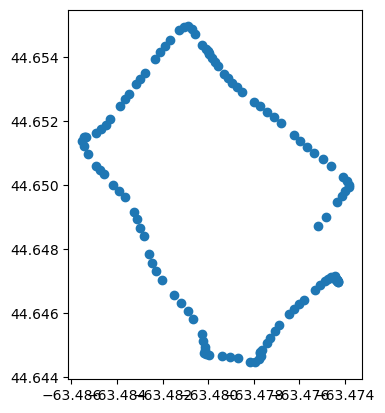

In [6]:
traj_data.plot()

In [7]:
traj_data.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

We can use fiona to open geodatabase (.gdb) file

In [8]:
gdb = fiona.open("C:/University Grade4/4G06/gert_compiled_v4.3/temp_workspace/data/network_dataset/CAN_GD.gdb")
print('Driver')
print(gdb.driver)
print('Schema')
print(gdb.schema)
print('CRS')
print(gdb.crs)
print('Length')
print(len(gdb))
print('Features')
#for feature in gdb:
#    print(feature)
#    print()

Driver
OpenFileGDB
Schema
{'properties': OrderedDict([('FULL_NAME', 'str:64'), ('L_F_ADD', 'float'), ('L_T_ADD', 'float'), ('R_F_ADD', 'float'), ('R_T_ADD', 'float'), ('PREFIX', 'str:2'), ('PRE_TYPE', 'str:10'), ('NAME', 'str:40'), ('TYPE', 'str:10'), ('SUFFIX', 'str:2'), ('CARTO', 'float'), ('CITYL', 'str:68'), ('LEFT_MAF', 'str:70'), ('ZIPL', 'str:3'), ('STATE_ABBR', 'str:2'), ('ONEWAY', 'str:2'), ('ON_RAMP', 'int'), ('OFF_RAMP', 'int'), ('EXIT_NUM', 'str:30'), ('EXIT_DIR', 'str:2'), ('FERRY_TYPE', 'str:68'), ('ROAD_DIR', 'str:2'), ('FNODE', 'float'), ('TNODE', 'float'), ('SPD_MI', 'float'), ('RDLEN_MI', 'float'), ('SPD_KM', 'float'), ('RDLEN_M', 'float'), ('FT_MINUTES', 'float'), ('TF_MINUTES', 'float'), ('F_ZLEV', 'int'), ('T_ZLEV', 'int'), ('SHAPEID', 'float'), ('USERID', 'float'), ('CFCC', 'str:3'), ('DISP_CODE', 'float'), ('RECORD_', 'float'), ('FJUNCTION', 'float'), ('TJUNCTION', 'float'), ('ALIAS_NAME', 'str:69'), ('FORMERNAME', 'str:69'), ('HWY_NAME', 'str:50'), ('HWY_NUM', '

Or open geodatabase directly with geopandas to create a geodataframe

In [9]:
gdb_df = gpd.read_file("C:/University Grade4/4G06/gert_compiled_v4.3/temp_workspace/data/network_dataset/CAN_GD.gdb")
len(gdb_df)

189

In [10]:
gdb_df.head()

,FULL_NAME,L_F_ADD,L_T_ADD,R_F_ADD,R_T_ADD,PREFIX,PRE_TYPE,NAME,TYPE,SUFFIX,...,FJUNCTION,TJUNCTION,ALIAS_NAME,FORMERNAME,HWY_NAME,HWY_NUM,TRANSCDAHWY,YELOWHDHWY,Shape_Length,geometry
0,MORRIS LAKE DR,0.0,0.0,0.0,0.0,,,MORRIS LAKE,DR,,...,2026002.0,2025998.0,None,None,None,None,NaN,NaN,0.000047,"MULTILINESTRING ((-63.48889 44.65367, -63.4889..."
1,NOVA TERR,84.0,94.0,91.0,93.0,,,NOVA,TERR,,...,2026151.0,2026205.0,None,None,None,None,NaN,NaN,0.000824,"MULTILINESTRING ((-63.48590 44.65932, -63.4851..."
2,GRENADIER DR,70.0,88.0,0.0,0.0,,,GRENADIER,DR,,...,2026390.0,2026319.0,None,None,None,None,NaN,NaN,0.001486,"MULTILINESTRING ((-63.48154 44.65803, -63.4829..."
3,MILLBROOK AVE,0.0,0.0,0.0,0.0,,,MILLBROOK,AVE,,...,2026354.0,2026375.0,None,None,None,None,NaN,NaN,0.000459,"MULTILINESTRING ((-63.48236 44.65135, -63.4822..."
4,ROWAN CRT,0.0,0.0,0.0,0.0,,,ROWAN,CRT,,...,2026198.0,2026198.0,None,None,None,None,NaN,NaN,0.000654,"MULTILINESTRING ((-63.48522 44.65248, -63.4852..."


In [11]:
gdb_df.dtypes

FULL_NAME         object
L_F_ADD          float64
L_T_ADD          float64
R_F_ADD          float64
R_T_ADD          float64
PREFIX            object
PRE_TYPE          object
NAME              object
TYPE              object
SUFFIX            object
CARTO            float64
CITYL             object
LEFT_MAF          object
ZIPL              object
STATE_ABBR        object
ONEWAY            object
ON_RAMP            int64
OFF_RAMP           int64
EXIT_NUM          object
EXIT_DIR          object
FERRY_TYPE        object
ROAD_DIR          object
FNODE            float64
TNODE            float64
SPD_MI           float64
RDLEN_MI         float64
SPD_KM           float64
RDLEN_M          float64
FT_MINUTES       float64
TF_MINUTES       float64
F_ZLEV             int64
T_ZLEV             int64
SHAPEID          float64
USERID           float64
CFCC              object
DISP_CODE        float64
RECORD_          float64
FJUNCTION        float64
TJUNCTION        float64
ALIAS_NAME        object


In [12]:
gdb_df['ONEWAY'] == ' '

0      True
1      True
2      True
3      True
4      True
       ... 
184    True
185    True
186    True
187    True
188    True
Name: ONEWAY, Length: 189, dtype: bool

In [13]:
str(gdb_df['geometry'].iloc[0])

'MULTILINESTRING ((-63.4888949999999 44.65367200000009, -63.48894199999995 44.65367200000009))'

In [14]:
len(gdb_df[gdb_df.geom_type == 'MultiLineString'])

189

<AxesSubplot:>

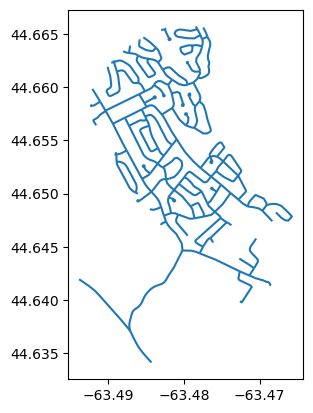

In [15]:
gdb_df.plot()

We can set and project a Coordinate Reference System (CRS) with EPSG number to adjust the scale of the plot for the trajectory data

{'init': 'epsg:26920', 'no_defs': True}


<Projected CRS: EPSG:26920>
Name: NAD83 / UTM zone 20N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - 66°W to 60°W and NAD83 by country
- bounds: (-66.0, 15.63, -60.0, 84.0)
Coordinate Operation:
- name: UTM zone 20N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

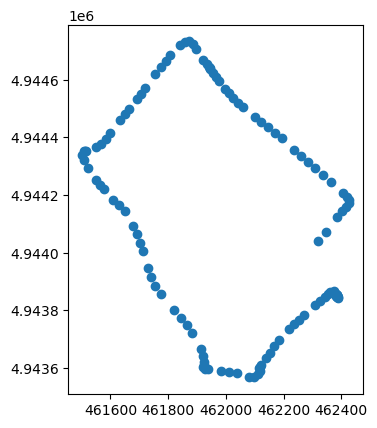

In [16]:
# Import specific function 'from_epsg' from fiona module
from fiona.crs import from_epsg

print(from_epsg(26920))
#traj_data.crs = from_epsg(26920)
traj_data_crs = traj_data.to_crs('EPSG:26920')

traj_data_crs.plot()
traj_data_crs.crs

In [17]:
traj_data.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Using to_file method to output the geodataframe as a shapefile (.shp) or other types of file if needed

In [18]:
traj_data_crs.to_file("./traj_with_crs.shp")

In [19]:
traj_data_crs = gpd.read_file("./traj_with_crs.shp")

In [20]:
traj_data_crs.head()

,EPISODEID,TRACKID,DURSEC,TIMESTART,ACTCODE,DESTCODE,geometry
0,14640_20070403_17,15325184,11,12:34:13,car,car,POINT (462385.143 4943852.226)
1,14640_20070403_17,15325185,2,12:34:15,car,car,POINT (462383.933 4943852.233)
2,14640_20070403_17,15325187,5,12:34:20,car,car,POINT (462383.923 4943850.538)
3,14640_20070403_17,15325188,3,12:34:23,car,car,POINT (462386.924 4943846.283)
4,14640_20070403_17,15325189,2,12:34:25,car,car,POINT (462387.524 4943845.433)


<AxesSubplot:>

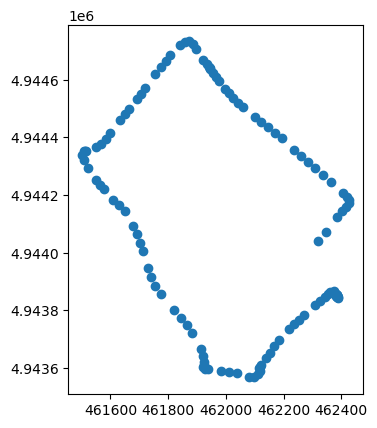

In [21]:
traj_data_crs.plot()

With a geodataframe that is projected to the Projected CRS, we can calculate the length of the trajectory by the following approach

In [22]:
shifted_df = traj_data_crs.shift()
traj_len = traj_data_crs.distance(shifted_df)[1:].sum()
print("Original length of the GPS trajectory is: " + str(round(traj_len,2)) + "m")

Original length of the GPS trajectory is: 3221.49m


Transfer the geopandas dataframe to geojson format then to json string and use geojsonio package to display the GPS points

In [23]:
traj_data_crs.to_file('traj_with_crs.geojson', driver='GeoJSON')

In [24]:
#print(gdb_df.to_json())

In [25]:
print(gjsio.make_url(gdb_df.head().to_json()))

http://geojson.io/#data=data:application/json,%7B%22type%22%3A%20%22FeatureCollection%22%2C%20%22features%22%3A%20%5B%7B%22id%22%3A%20%220%22%2C%20%22type%22%3A%20%22Feature%22%2C%20%22properties%22%3A%20%7B%22ALIAS_NAME%22%3A%20null%2C%20%22CARTO%22%3A%205.0%2C%20%22CFCC%22%3A%20%22A40%22%2C%20%22CITYL%22%3A%20%22HALIFAX%22%2C%20%22DISP_CODE%22%3A%2040.0%2C%20%22EXIT_DIR%22%3A%20%22%20%22%2C%20%22EXIT_NUM%22%3A%20%22%20%22%2C%20%22FERRY_TYPE%22%3A%20%22%20%22%2C%20%22FJUNCTION%22%3A%202026002.0%2C%20%22FNODE%22%3A%201542668.0%2C%20%22FORMERNAME%22%3A%20null%2C%20%22FT_MINUTES%22%3A%200.004%2C%20%22FULL_NAME%22%3A%20%22MORRIS%20LAKE%20DR%22%2C%20%22F_ZLEV%22%3A%200%2C%20%22HWY_NAME%22%3A%20null%2C%20%22HWY_NUM%22%3A%20null%2C%20%22LEFT_MAF%22%3A%20%22HALIFAX%22%2C%20%22L_F_ADD%22%3A%200.0%2C%20%22L_T_ADD%22%3A%200.0%2C%20%22NAME%22%3A%20%22MORRIS%20LAKE%22%2C%20%22OFF_RAMP%22%3A%200%2C%20%22ONEWAY%22%3A%20%22%20%22%2C%20%22ON_RAMP%22%3A%200%2C%20%22PREFIX%22%3A%20%22%20%22%2C%20%22PRE_

In [26]:
traj_gjs = gpd.read_file('traj_with_crs.geojson')
traj_gjs = traj_data.to_json()
#print((traj_gjs))

Can also use gjsio.display(traj_gjs) to display, but the url would be too long for Windows to handle

In [27]:
#gjsio.display(traj_gjs)
# Click the printed url to display the GPS points
print(gjsio.make_url(traj_gjs))

http://geojson.io/#data=data:application/json,%7B%22type%22%3A%20%22FeatureCollection%22%2C%20%22features%22%3A%20%5B%7B%22id%22%3A%20%220%22%2C%20%22type%22%3A%20%22Feature%22%2C%20%22properties%22%3A%20%7B%22ACTCODE%22%3A%20%22car%22%2C%20%22DESTCODE%22%3A%20%22car%22%2C%20%22DURSEC%22%3A%20%2211%22%2C%20%22EPISODEID%22%3A%20%2214640_20070403_17%22%2C%20%22TIMESTART%22%3A%20%2212%3A34%3A13%22%2C%20%22TRACKID%22%3A%20%2215325184%22%7D%2C%20%22geometry%22%3A%20%7B%22type%22%3A%20%22Point%22%2C%20%22coordinates%22%3A%20%5B-63.47434997%2C%2044.64704513%5D%7D%7D%2C%20%7B%22id%22%3A%20%221%22%2C%20%22type%22%3A%20%22Feature%22%2C%20%22properties%22%3A%20%7B%22ACTCODE%22%3A%20%22car%22%2C%20%22DESTCODE%22%3A%20%22car%22%2C%20%22DURSEC%22%3A%20%222%22%2C%20%22EPISODEID%22%3A%20%2214640_20070403_17%22%2C%20%22TIMESTART%22%3A%20%2212%3A34%3A15%22%2C%20%22TRACKID%22%3A%20%2215325185%22%7D%2C%20%22geometry%22%3A%20%7B%22type%22%3A%20%22Point%22%2C%20%22coordinates%22%3A%20%5B-63.47436523%2C%2044

In [28]:
output_route = "C:/University Grade4/4G06/gert_compiled_v4.3/map-matching_shared_v4.3/data/output/14640_20070403_17_colocated.shp"
output_traj_data = gpd.read_file(output_route)

In [29]:
output_traj_data

,route_name,distance_m,time_min,crowdist_m,traclen_m,num_roads,l_turns,r_turns,sl_turns,sr_turns,t_turns,rdi,crossings,distxing,longleg_nm,longleg_dm,geometry
0,14640_20070403_17_colocated,3279.473234,3.93404,0.820476,3298.203344,7,5,1,1,1,8,3997.04,21,156.165392,CALDWELL RD,875.671,"LINESTRING (-63.47446 44.64722, -63.47432 44.6..."


In [30]:
output_traj_data.to_file('output_traj.geojson', driver='GeoJSON')
output_traj_gjs = gpd.read_file('output_traj.geojson')
#output_traj_gjs = output_traj_data.to_json()
output_traj_gjs = output_traj_gjs.to_json()
#print(output_traj_gjs)

In [31]:
print(gjsio.make_url(output_traj_gjs))

http://geojson.io/#data=data:application/json,%7B%22type%22%3A%20%22FeatureCollection%22%2C%20%22features%22%3A%20%5B%7B%22id%22%3A%20%220%22%2C%20%22type%22%3A%20%22Feature%22%2C%20%22properties%22%3A%20%7B%22crossings%22%3A%2021%2C%20%22crowdist_m%22%3A%200.820476417724%2C%20%22distance_m%22%3A%203279.473234%2C%20%22distxing%22%3A%20156.165392095%2C%20%22l_turns%22%3A%205%2C%20%22longleg_dm%22%3A%20875.671%2C%20%22longleg_nm%22%3A%20%22CALDWELL%20RD%22%2C%20%22num_roads%22%3A%207%2C%20%22r_turns%22%3A%201%2C%20%22rdi%22%3A%203997.04%2C%20%22route_name%22%3A%20%2214640_20070403_17_colocated%22%2C%20%22sl_turns%22%3A%201%2C%20%22sr_turns%22%3A%201%2C%20%22t_turns%22%3A%208%2C%20%22time_min%22%3A%203.93404%2C%20%22traclen_m%22%3A%203298.20334412%7D%2C%20%22geometry%22%3A%20%7B%22type%22%3A%20%22LineString%22%2C%20%22coordinates%22%3A%20%5B%5B-63.474462580999955%2C%2044.64722483800006%5D%2C%20%5B-63.474321%2C%2044.647322%5D%2C%20%5B-63.474444%2C%2044.64734%5D%2C%20%5B-63.474523%2C%2044.6

Prototype code of converting CSV file to Shapefile

In [32]:
# Read CSV file with Pandas to generate dataframe
csv_path = 'C:/University Grade4/4G06/PyERT-BLACK/quarto-example/data/sample-gps/sample-gps-1.csv'
gps_df = pd.read_csv(csv_path)
gps_df.head()

,RecordID,SerialID,LocalTime,latitude,longitude,Fix_Status,DOP,Speed_kmh,Limit_kmh
0,5685,26,9/3/2009 11:57,43.337420,-79.790290,3D Fix,0.5,0.0,50
1,5686,26,9/3/2009 11:57,43.337422,-79.790290,3D Fix,0.5,0.0,50
2,5687,26,9/3/2009 11:57,43.337420,-79.790288,3D Fix,0.5,0.0,50
3,5688,26,9/3/2009 11:57,43.337418,-79.790283,3D Fix,0.5,2.2,50
4,5689,26,9/3/2009 11:57,43.337410,-79.790272,3D Fix,0.5,5.9,50


In [33]:
# Transfer dataframe to geodataframe for geopandas
gps_gdf = gpd.GeoDataFrame(gps_df, geometry = gpd.points_from_xy(gps_df['longitude'], gps_df['latitude']))
gps_gdf.head()

C:\Users\jimta\anaconda3\envs\geopandas_env\lib\site-packages\geopandas\array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


,RecordID,SerialID,LocalTime,latitude,longitude,Fix_Status,DOP,Speed_kmh,Limit_kmh,geometry
0,5685,26,9/3/2009 11:57,43.337420,-79.790290,3D Fix,0.5,0.0,50,POINT (-79.79029 43.33742)
1,5686,26,9/3/2009 11:57,43.337422,-79.790290,3D Fix,0.5,0.0,50,POINT (-79.79029 43.33742)
2,5687,26,9/3/2009 11:57,43.337420,-79.790288,3D Fix,0.5,0.0,50,POINT (-79.79029 43.33742)
3,5688,26,9/3/2009 11:57,43.337418,-79.790283,3D Fix,0.5,2.2,50,POINT (-79.79028 43.33742)
4,5689,26,9/3/2009 11:57,43.337410,-79.790272,3D Fix,0.5,5.9,50,POINT (-79.79027 43.33741)


In [34]:
# Set CRS to geodataframe and generate shapefile
gps_gdf = gps_gdf.set_crs('epsg:4326')
gps_gdf.to_file(filename='sample_gps_1', driver = 'ESRI Shapefile')

In [35]:
gps_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

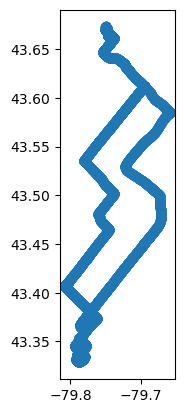

In [36]:
gps_gdf.plot()

In [37]:
#from IPython.display import HTML 
#text = 'click this'
#HTML(f'<a href="{gjsio.make_url(gdb_df.to_json())}">{text}</a>')